Contrast Enhancment

Import Library

In [1]:
# Mengimpor library yang diperlukan
# digunakan untuk operasi array dan manipulasi data numerik
import numpy as np
# digunakan untuk membuat plot grafik
import matplotlib.pyplot as plt
# digunakan untuk menampilkan plot di dalam notebook
%matplotlib inline
# digunakan untuk pemrosesan gambar dan komputer visi
import cv2
# digunakan untuk membaca dan menampilkan gambar
import matplotlib.image as mpimg

Read Image

In [2]:
# Mendefinisikan path atau lokasi file gambar
image_path = "Shikamaru.jpeg"

# Membaca gambar dengan menggunakan OpenCV
# cv2.IMREAD_GRAYSCALE mengindikasikan bahwa gambar akan dibaca dalam mode grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Penerapan Histogram Equalization (HE)

In [3]:
# Menggunakan fungsi equalizeHist dari OpenCV untuk meng-equalisasikan histogram gambar grayscale
image_equalized = cv2.equalizeHist(image)

Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)

In [4]:
# Membuat objek CLAHE (Contrast Limited Adaptive Histogram Equalization) menggunakan OpenCV
# dengan parameter clipLimit=2 dan tileGridSize=(8,8)
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8, 8))

# Menggunakan objek CLAHE yang telah dibuat untuk meng-aplikasikan CLAHE pada gambar grayscale
image_clahe = clahe.apply(image)

Penerapan metode Contrast Stretching (CS)

In [5]:
# Menginisialisasi matriks kosong dengan ukuran yang sama dengan gambar grayscale
image_cs = np.zeros((image.shape[0], image.shape[1]), dtype='uint8')

# Menentukan nilai minimum dan maksimum dari gambar grayscale
min_val = np.min(image)
max_val = np.max(image)

# Melakukan operasi kontras stretching menggunakan metode min-max normalization
# untuk menyesuaikan nilai piksel dalam rentang 0-255
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_cs[i, j] = 255 * (image[i, j] - min_val) / (max_val - min_val)

Penerapan Metode Perkalian Konstanta

In [6]:
# Membuat salinan gambar dengan tipe data float
copyCamera = image.copy().astype(float)

# Mendapatkan dimensi gambar
m1, n1 = copyCamera.shape

# Membuat matriks kosong dengan ukuran yang sama dengan gambar
output1 = np.empty([m1, n1])

# Melakukan operasi perkalian pada setiap piksel gambar dengan faktor 1.9
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9

Plot Image

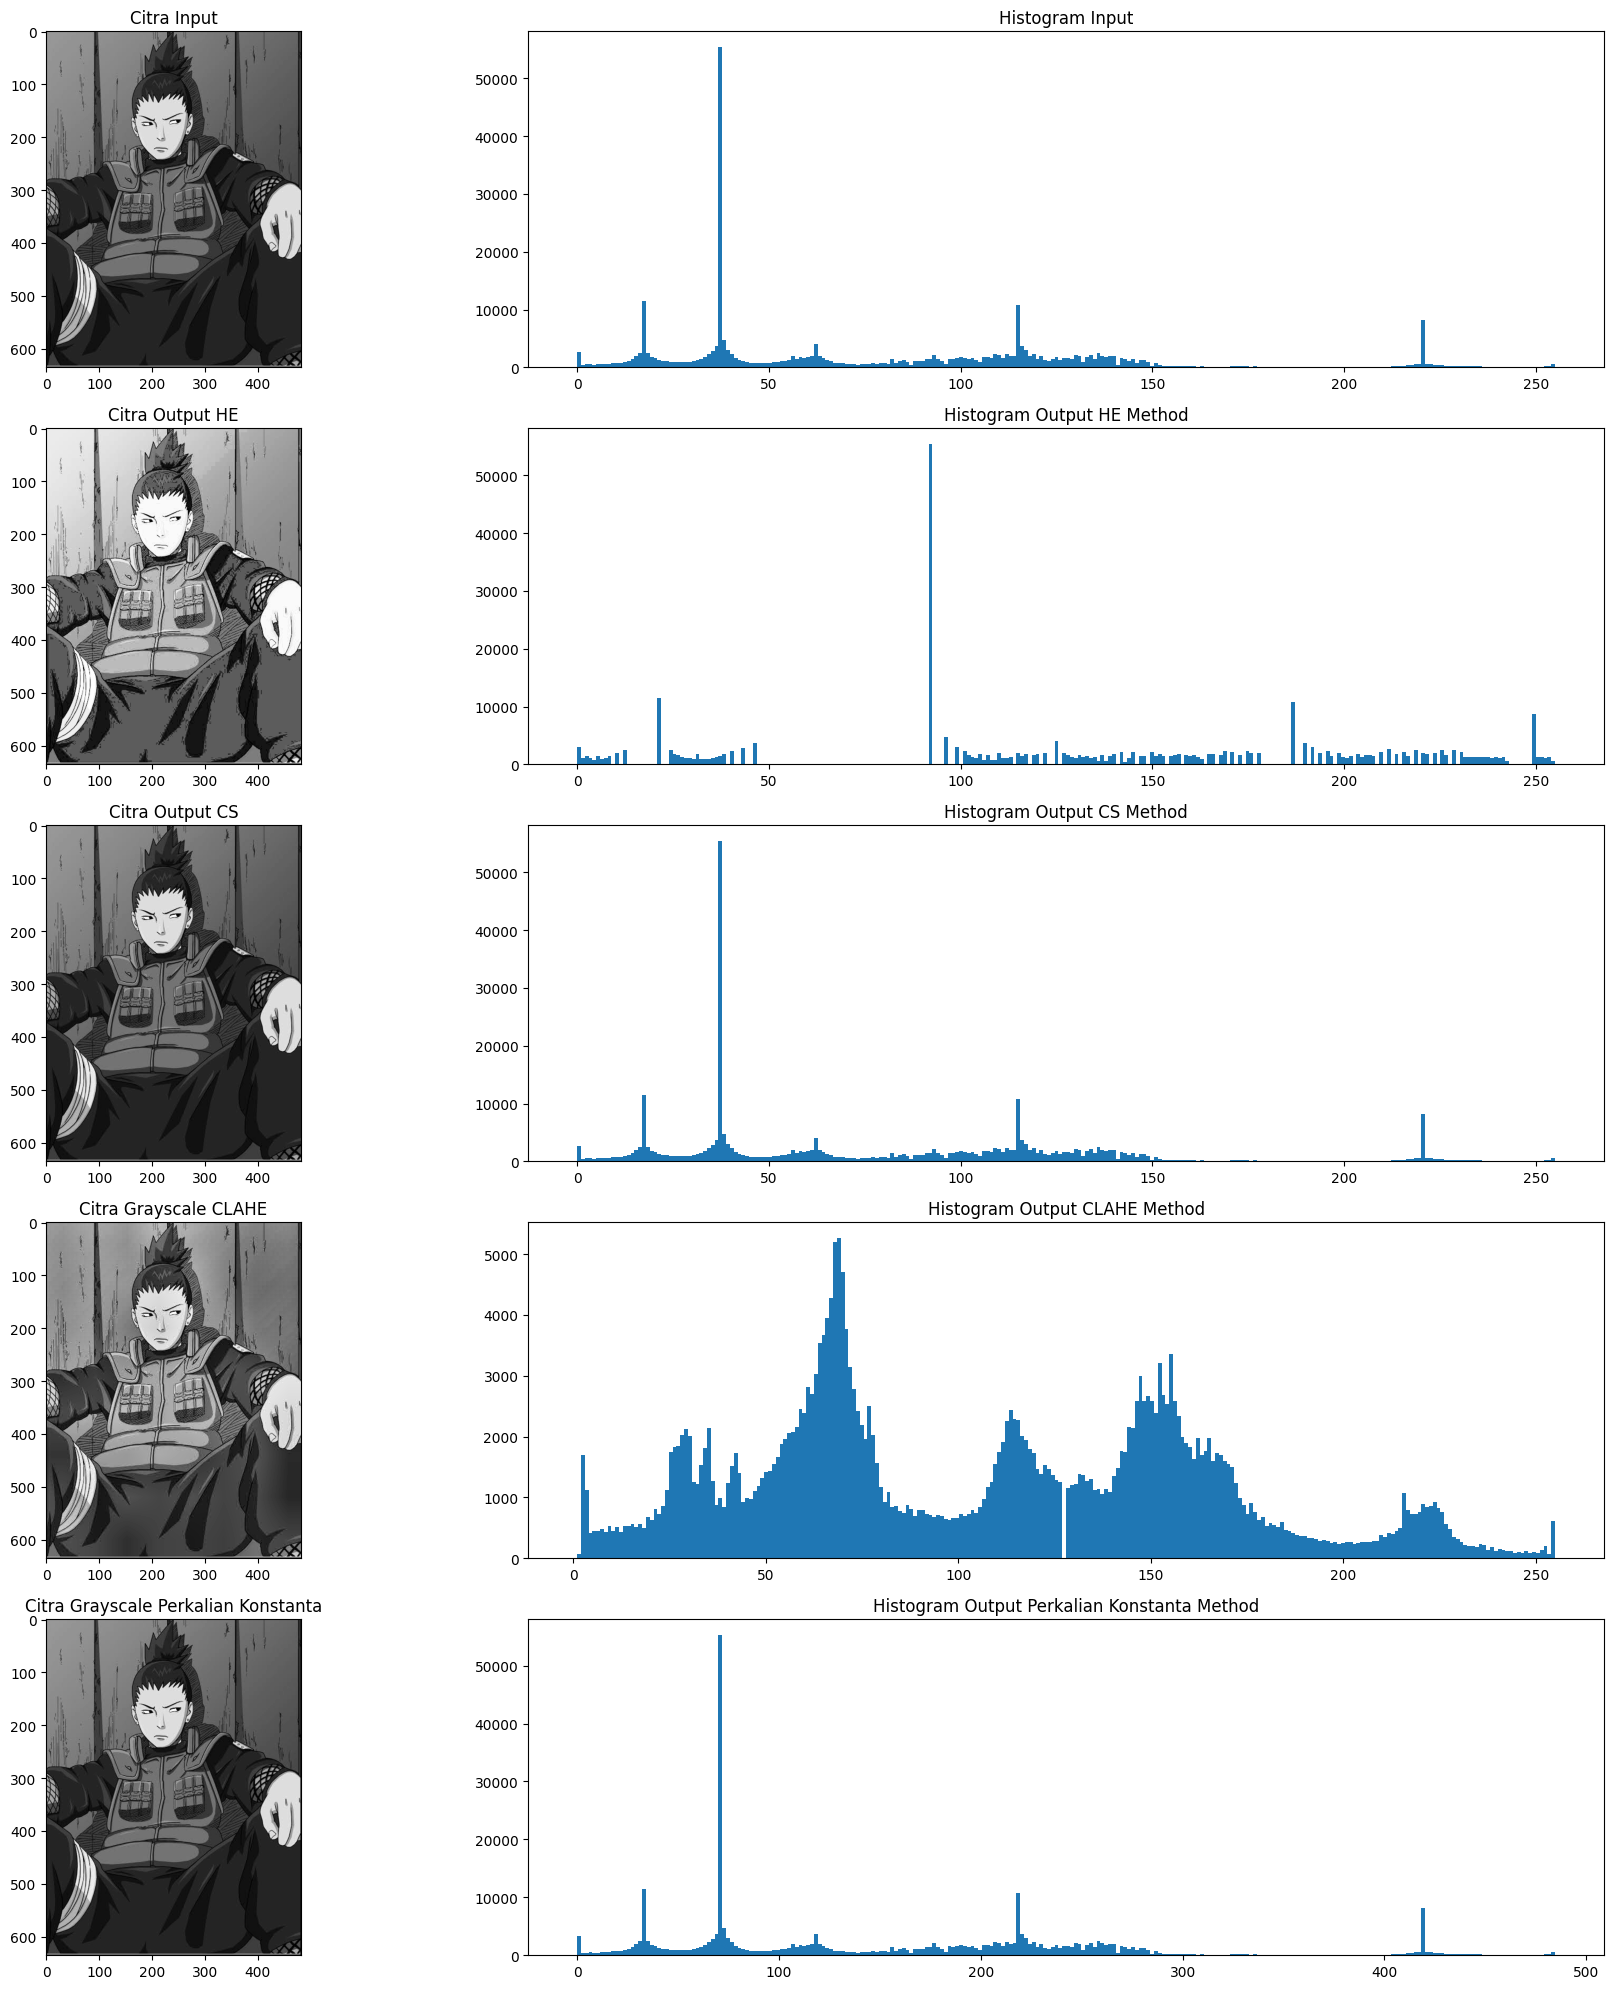

In [7]:
# Membuat subplot dengan ukuran 5 baris dan 2 kolom, serta ukuran total 20x20
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()

# Menampilkan citra input
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")

# Menampilkan histogram citra input
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')

# Menampilkan citra hasil equalisasi histogram
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")

# Menampilkan histogram citra hasil equalisasi histogram
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

# Menampilkan citra hasil kontras stretching
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")

# Menampilkan histogram citra hasil kontras stretching
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

# Menampilkan citra hasil CLAHE
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")

# Menampilkan histogram citra hasil CLAHE
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

# Menampilkan citra hasil perkalian konstanta
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")

# Menampilkan histogram citra hasil perkalian konstanta
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

# Mengatur tata letak subplot
fig.tight_layout()
